# HOUSE PRICE DATASET in INDIA

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

|Columns|Description|비고|
|------|---|---|
|POSTED_BY|부동산을 등록한 사람|Object|
|UNDER_CONSTRUCTION|현재 건설 중인지 여부|Int64|
|RERA|RERA 승인 여부|Int64|
|BHK_NO|방의 수|Int64|
|BHK_OR_RK|부동산 유형|Object|
|SQUARE_FT|집의 총 면적|Float64|
|READY_TO_MOVE|이동 준비 여부|Int64|
|RESALE|재판매 여부|Int64|
|ADDRESS|집의 주소|Object|
|LONGITUDE|집의 경도|Float64|
|LATITUDE|집의 위도|Float64|

In [2]:
import pandas as pd

house_df = pd.read_csv('../data/House_price/train.csv')
df_train = house_df.copy()
df_train.info()
df_test = pd.read_csv('../data/House_price/test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68720 entries, 0 to 68719
Data columns (total 11 co

In [3]:
df_train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [4]:
df_train.shape

(29451, 12)

In [5]:
df_train.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [6]:
df_train.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


## 데이터 변경

중복된 데이터 제거

TARGET(PRICE_IN_LACS) -> PRICE

POSTED_BY의 경우 Owner = 0, Dealer=1, Builder=2로 한다.

BHK_OR_RK의 경우 BHK = 0, RK=1로 한다.

ADDRESS를 어떻게 해야할지 고민 (위도, 경도로 대체할 예정)


geopy 라이브러리를 사용하면 위도 경도를 추출 할 수 있다고 해서 하기전 데이터크기가 너무 커서 사용전 다른 파일로 확인해 보았으나 400개의 데이터로도 시간이 걸리는 것을 보고 보류..

In [7]:
df_train['ADDRESS'].value_counts()

ADDRESS
Zirakpur,Chandigarh                   509
Whitefield,Bangalore                  230
Raj Nagar Extension,Ghaziabad         215
Sector-137 Noida,Noida                139
New Town,Kolkata                      131
                                     ... 
Ambika Township,Jivarajpark,Rajkot      1
Cheranalloor,Kochi                      1
Baba Nagar,Bangalore                    1
Barra Devi Naubasta road,Kanpur         1
E3-108, Lake View Recidency,,Vapi       1
Name: count, Length: 6899, dtype: int64

In [8]:
duplicate_rows = df_train[df_train.duplicated()]

print(duplicate_rows)

      POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
1904     Dealer                   1     0        3       BHK  1209.628644   
2351     Dealer                   0     0        2       BHK   896.680112   
2611     Dealer                   0     0        3       BHK  1350.256549   
2618     Dealer                   1     0        2       BHK   800.000000   
3211      Owner                   0     0        2       BHK   712.105799   
...         ...                 ...   ...      ...       ...          ...   
29321    Dealer                   0     1        1       BHK   649.641577   
29345    Dealer                   1     1        3       BHK  1563.155686   
29357     Owner                   0     1        3       BHK  1446.201311   
29389   Builder                   1     0        3       BHK   979.290979   
29410    Dealer                   1     0        1       BHK   650.022160   

       READY_TO_MOVE  RESALE                        ADDRESS  LONGITUDE  \
1

In [9]:
df_train.drop_duplicates(inplace=True) # 중복행 제거 400개 가량의 데이터 사라짐
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29050 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29050 non-null  object 
 1   UNDER_CONSTRUCTION     29050 non-null  int64  
 2   RERA                   29050 non-null  int64  
 3   BHK_NO.                29050 non-null  int64  
 4   BHK_OR_RK              29050 non-null  object 
 5   SQUARE_FT              29050 non-null  float64
 6   READY_TO_MOVE          29050 non-null  int64  
 7   RESALE                 29050 non-null  int64  
 8   ADDRESS                29050 non-null  object 
 9   LONGITUDE              29050 non-null  float64
 10  LATITUDE               29050 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29050 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.9+ MB


In [10]:
df_train.rename(columns = {'TARGET(PRICE_IN_LACS)':"PRICE"}, inplace=True)

c:\users\zpdlc\appdata\local\programs\python\python311\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


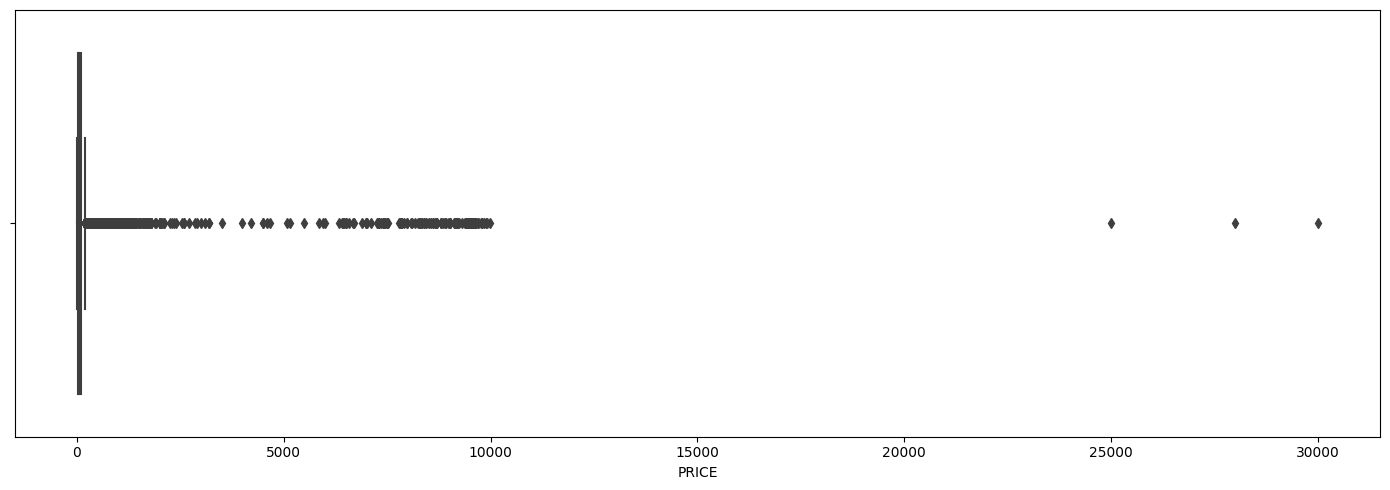

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Box_plot for SalePrice
plt.figure(figsize=(14,5))
sns.boxplot(data = df_train,x='PRICE')
plt.tight_layout()

데이터를 log화 시키면 좀 더 안정적으로 변화하는 것을 확인 할 수 있다 데이터 이상치가 매우 많거나, 불균형한 데이터가 많아 데이터 전처리를 위주로 생각하는게 좋을 것 같습니다.

<Axes: xlabel='PRICE', ylabel='Density'>

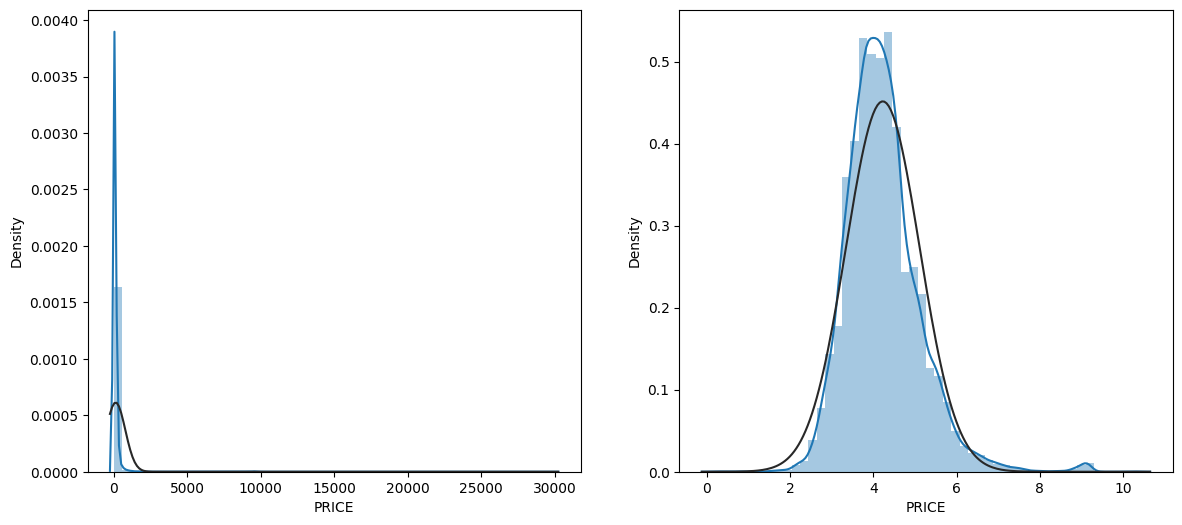

In [12]:
import numpy as np
from scipy.stats import norm
import warnings
warnings.simplefilter("ignore")

figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(14,6)
sns.distplot(df_train['PRICE'], fit=norm, ax=ax1)
sns.distplot(np.log(df_train['PRICE']+1), fit=norm, ax=ax2)

In [13]:
df_train["POSTED_BY"].value_counts()

POSTED_BY
Dealer     17961
Owner      10470
Builder      619
Name: count, dtype: int64

In [14]:
df_train["BHK_OR_RK"].value_counts() 
# 해당값은 데이터의 불균형이 너무 큰데 괜찮은가 싶다.

BHK_OR_RK
BHK    29026
RK        24
Name: count, dtype: int64

In [15]:
df_train.replace({"POSTED_BY":{"Owner":0,"Dealer":1,"Builder":2}},inplace=True)
df_train.replace({"BHK_OR_RK":{"BHK":0,"RK":1}},inplace=True)

df_test.replace({"POSTED_BY":{"Owner":0,"Dealer":1,"Builder":2}},inplace=True)
df_test.replace({"BHK_OR_RK":{"BHK":0,"RK":1}},inplace=True)

## 전체 데이터 상관관계 분석

ADDRESS 제외

In [16]:
df_not_address = df_train.drop(labels='ADDRESS',axis=1)

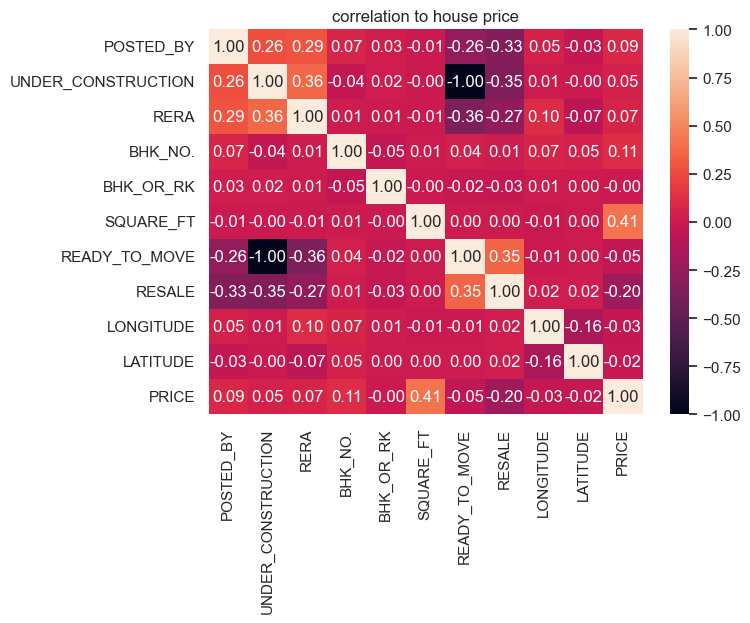

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(7,5)})


sns.heatmap(df_not_address.corr(), annot=True,fmt= '.2f')
plt.title("correlation to house price")
plt.show()

PRICE와 SQUARE_FT의 상관관계가 가장높아 데이터를 시각화 해보았는데 데이터..? 이상하다..

[Text(0.5, 0, 'SQUARE_FT'), Text(0, 0.5, 'PRICE')]

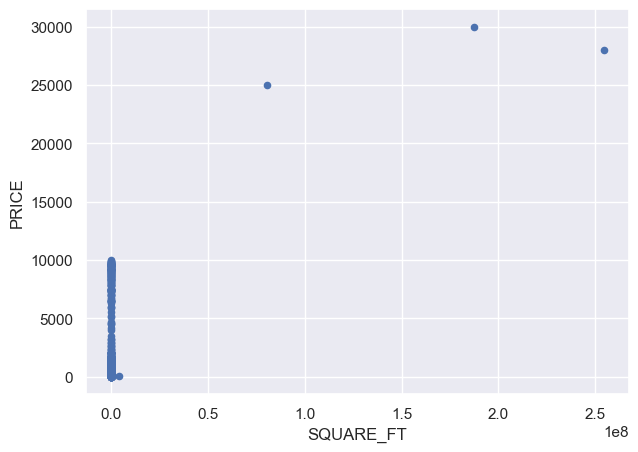

In [21]:
ax=df_train.plot(kind='scatter',x='SQUARE_FT',y='PRICE')
ax.set(xlabel='SQUARE_FT',ylabel='PRICE')

데이터 불균형이 심해보인다.

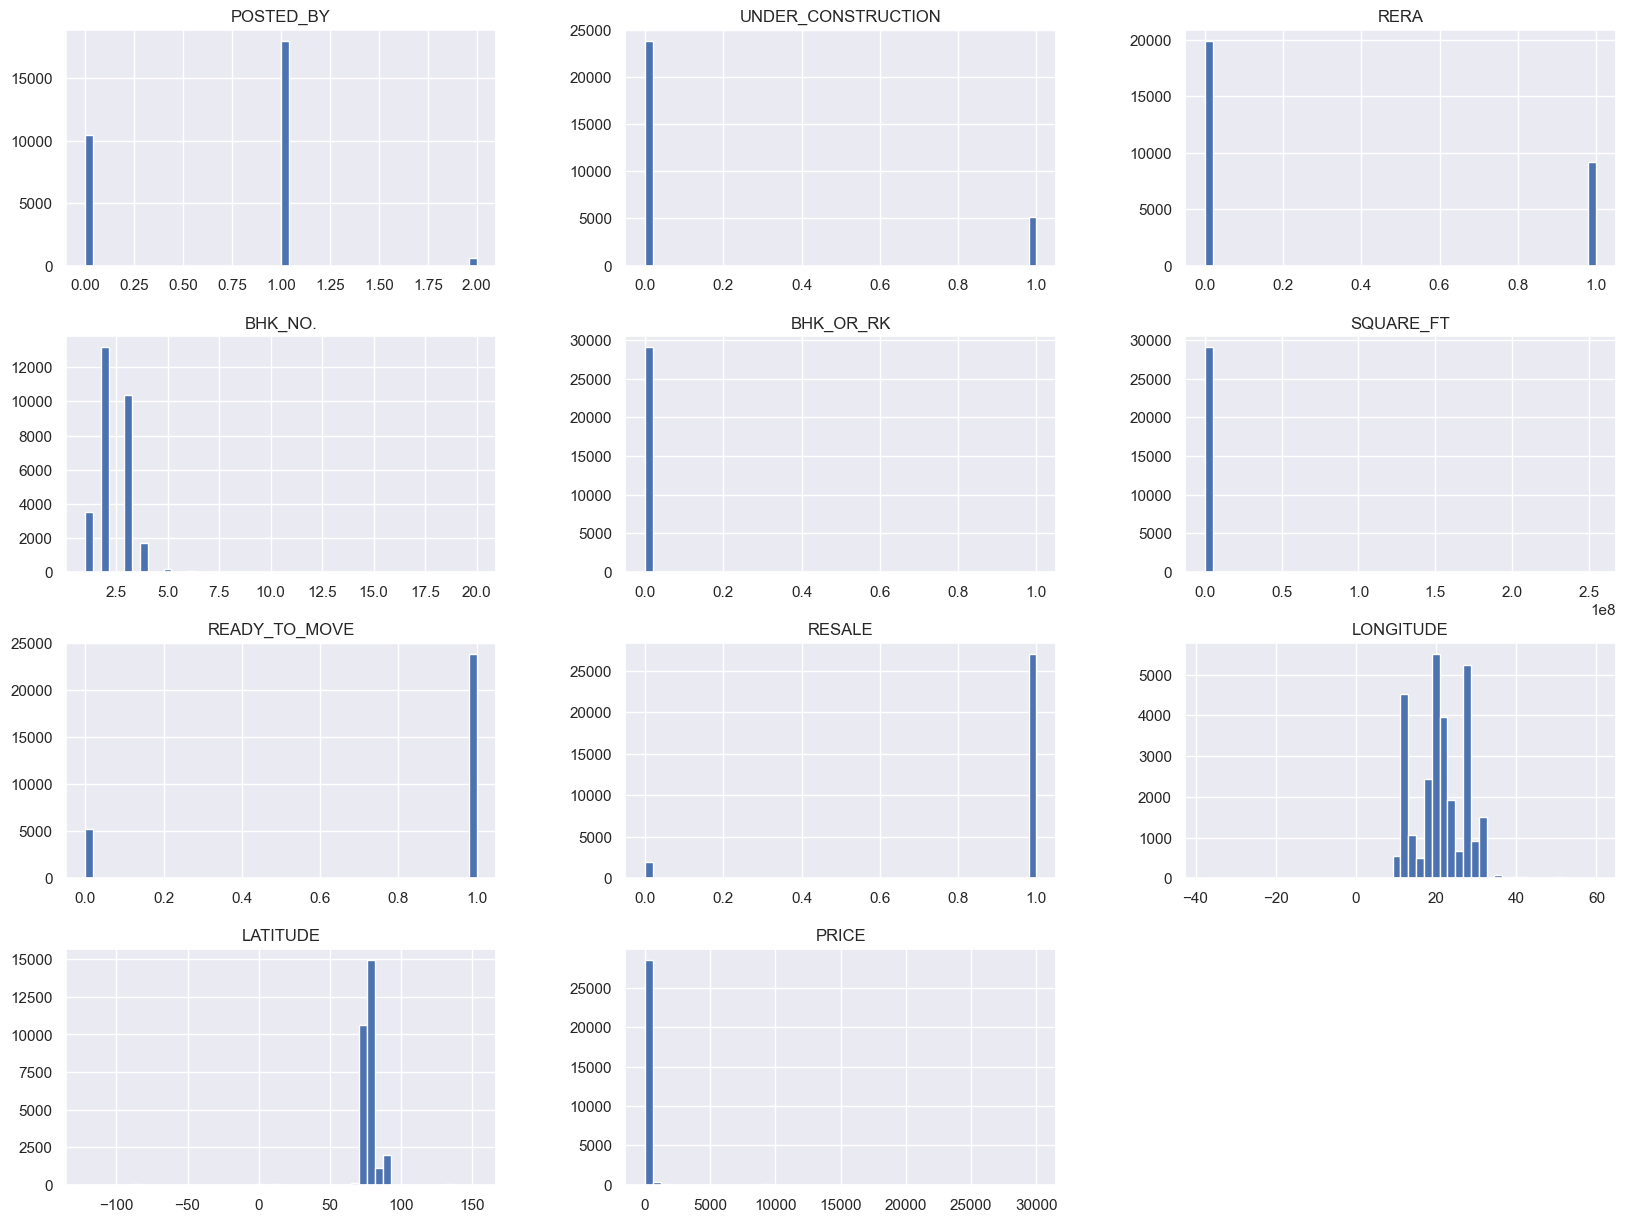

In [19]:
df_train.hist(bins=50, figsize=(20,15))
plt.show()

단순히 히트맵의 결과로는 0.1 or -0.1보다 크거나 작은 수만 챙기면
- BHK_NO
- SQUARE_FT
- RESALE

집의 크기가 가장 큰 영향을 주었고 재판매 여부가 다음 방의 갯수가 마지막으로 영향을 주었다.

resale의 경우 역관계성이므로 가격이 낮아지는 경향이 있는것 같다.

집값을 제외한 각 속성간의 상관관계 분석
- UNDER_CONSTRUCTION은 RERA, READY_TO_MOVE, RESALE
- RERA는 UNDER_CONSTRUCTION, READY_TO_MOVE, RESALE, LONGITUDE

- 지역별로 어떻게 집이 분포되어있는지 MAP을 확인해본다

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(df_train,
                        lat=df_train.LONGITUDE,
                        lon=df_train.LATITUDE,
                        size=df_train.PRICE,
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=10,
                        mapbox_style="carto-positron")

fig.show()

일단 에러가 고쳐지지 않는다... 코랩에서는 잘되는데 이걸 확인하면 인도 뿐만 아니라 다른 나라의 데이터도 있다는걸 알 수 있다 이는 결측치로 제거한다.

In [ ]:
sns.barplot(data=df_train, x="POSTED_BY",y="PRICE")


- 집의 크기와 각 가격이 어떻게 분포하는지 확인해본다

In [ ]:
plt.figure(figsize=(12,4))

sqft_range = [0,500,1000,1500,2000,2500,3000,3500,4000]
target = [0,50,100,150,200,250,300,350,400,450,500]

# Histogram for SQUARE_FT
plt.subplot(1, 2, 1)
plt.hist(df_train['SQUARE_FT'], color='blue',bins=sqft_range, edgecolor='black', alpha=0.7)
plt.title('Histogram for SQUARE_FT')
plt.xlabel('SQUARE_FT')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for TARGET
plt.subplot(1, 2, 2)
plt.hist(df_train['PRICE'], bins=target, color='green', edgecolor='black', alpha=0.7)
plt.title('Histogram for PRICE')
plt.xlabel('PRICE')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

평수는 정규분포와 비슷한 형태 하지만 가격의 경우 낮은 가격때가 많다

- ADDRESS에서 도시의 이름만 추출하기 위한 과정

코드에는 오류가 없어보이는데 자꾸 오류가 난다. Pandas 버전 문제라고 하는 곳이 많아 최신으로 업데이트 해 보았지만 작동하지 않는다.. 밑 내용을보니 사용하지 않으시는 것 같아 일단 빼고 진행하였습니다.

In [ ]:
df_train[['address', 'CITY']] = df_train['ADDRESS'].str.split(',', 1, expand=True)
df_train.drop(columns=['ADDRESS','address'], inplace=True)

df_train.head()

In [ ]:
df_test[['address', 'CITY']] = df_test['ADDRESS'].str.split(',', 1, expand=True)
df_test.drop(columns=['ADDRESS','address'], inplace=True)

df_test.head()

In [ ]:
df_train['CITY'].value_counts()

아직도 ','가 들어간 이름이 있다.

In [ ]:
df_train[['CITY_NAME', 'CITY2']] = df_train['CITY'].str.split(',', 1, expand=True)

df_train.drop(columns=['CITY','CITY2'], inplace=True)
df_train['CITY_NAME'].value_counts()

In [ ]:
df_test[['CITY_NAME', 'CITY2']] = df_test['CITY'].str.split(',', 1, expand=True)

df_test.drop(columns=['CITY','CITY2'], inplace=True)
df_test['CITY_NAME'].value_counts()

In [ ]:
plt.figure(figsize=(14, 10))

sns.barplot(data=df_train, x='CITY_NAME', y='PRICE',ci=None,estimator='mean')

- 433개의 도시가 추출되어 각 도시별 가격 분포이다.

In [ ]:
player2_test = df_test.copy()
player2_train = df_train.copy()

## 모델 학습

- RandomForest 사용
- 데이터 분석의 미흡으로 현재 데이터 중 CITY_NAME을 제외 후 학습
- GridSearch를 이용해 최적의 parmeter 찾기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter("ignore")

In [ ]:
df_train.head()

In [ ]:
#X = df_train.drop(["PRICE","CITY"],axis=1)
X = df_train.drop(['PRICE','ADDRESS'],axis=1)
y = df_train["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

rf_param = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_param, cv=5, scoring='r2',verbose=1)

In [ ]:
rf_grid.fit(X,y)

학습까지 진행하고 결론

- EDA를 통해 CITY_NAME을 어떻게 사용할지 추후 정한다.
- 불필요한 값을 제거해야한다.
- TQDM의 중요성 fit을 진행하는데 50분이 걸림..(코랩이 약간 빠름) device사용도 고려해야하고 빠르게 학습할 수 있는 방안을 고민해야할 것 같다.
- plotly.express를 show하는 부분에서 external로 보여주려고 하다보니 에러가 발생한 것으로 추정 install과 update를 해봤지만 해결하지 못함 internal에 render하는 방법이나 코랩에서 동작시켜야 한다.


- 이 데이터는 전처리 과정에서 지켜봐야 할 것이 있는데.
- 위도, 경도, 주소 피쳐(속성)값
- 위도, 경도는 일반적으로 그냥 집어 넣어도 되는데 주소값을 어떻게 처리할 것인가. 이걸 빼는지 마는지가 고민인 문제인데 보통 이런 경우 2가지 방법이 있다고 합니


    집값 데이터 예측 모델을 만들 때, 위도, 경도, 도시이름과 같은 지리적 정보를 어떻게 처리할지는 모델의 성능과 결과에 큰 영향을 미칠 수 있습니다. 여러 가지 방법이 있지만, 다음은 간단한 가이드라인

    위도 및 경도:

    위도와 경도는 그 자체로 모델에 입력으로 사용될 수 있습니다. 모델은 이 지리적 정보를 활용하여 지역 간의 패턴이나 관계를 학습할 수 있습니다. 단, 이 경우 스케일이 다르기 때문에 정규화(normalization)를 고려해야 할 수 있습니다.
    도시이름:

    도시이름은 범주형 변수로 처리될 수 있습니다. 가장 일반적인 방법은 도시이름을 원핫 인코딩으로 변환하는 것입니다. 각 도시는 고유한 인덱스에 해당하는 이진 벡터로 변환되어 모델에 입력됩니다. 이렇게 하면 모델이 도시 간의 차이를 학습할 수 있습니다.

# 저는 원핫 인코딩을 해서 XG부스터를 사용해보겠습니다.


In [ ]:
player2_train.info()

In [ ]:


df = pd.get_dummies(player2_train, columns=['CITY_NAME'], prefix='city')
df.info()

In [ ]:
df2 = pd.get_dummies(player2_test, columns=['CITY_NAME'], prefix='city')
df2.info()

Columns: 444 entries, POSTED_BY to city_yamuna Complex
dtypes: float64(4), int64(7), uint8(433)

칼럼이 개 많아진 걸 알 수 있다. 뭐 어때 일단 돌려보자

In [ ]:
# 필요한 라이브러리를 불러옵니다
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df.drop(["PRICE"],axis=1)
y = df["PRICE"]

# 데이터를 학습용과 테스트용으로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost에서 사용될 데이터 형식인 DMatrix를 생성합니다
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost 모델의 파라미터를 설정합니다
params = {
    'objective': 'reg:squarederror',  # 회귀 문제의 경우
    'max_depth': 3,                    # 트리의 최대 깊이
    'learning_rate': 0.1,              # 학습률
    'subsample': 0.8,                  # 각 트리에 사용될 데이터 샘플의 비율
    'colsample_bytree': 0.8,           # 각 트리에 사용될 특성의 비율
    'eval_metric': 'rmse'              # 평가 지표
}

# 모델을 학습합니다
num_round = 100  # 부스팅 라운드 수 (트리의 개수)
model = xgb.train(params, dtrain, num_round)

# 테스트 데이터에 대한 예측을 수행합니다
predictions = model.predict(dtest)

# 평가 지표를 계산합니다
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')


# 318? 뭐가 이렇게 커 일단 저장한 뒤 제출해보자

In [ ]:
dtest = xgb.DMatrix(df2)

test_predictions = model.predict(dtest)


submission = pd.DataFrame({'Price': test_predictions})
submission.to_csv('submission.csv', index=False)


#### 실수가 있었다. 학습 train데이터하고 test데이터하고 동일한 원핫 인코딩해도 칼럼이 다르다. 생각해보니 주소 값을 처리하신 방식이 그냥 주소를 , 구분으로 나눠서 저장한거라 당연히 test하고 train까지 다르다.
#### 칼럼이 동일해야 하는데 동일 하지 않으니 예측값이 나오질 않는다.

# 다음 타자가 할 일
### 1. 위도, 경도 --> 이거는 괜찮음
### 2. 주소 --> 이 정보를 test와 train이 동일하게 속성을 유지하면서 모델학습에 적정한 데이터로 가공하는것.

## 모델을 선정하는것 보다 다시 전처리로 가서 설정해야 할 것 같다.